# Trying CNN for modeling here with Undersampling



In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import classification_report , confusion_matrix ,plot_confusion_matrix

import matplotlib.pyplot as plt
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation, Flatten, Dropout
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score

from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping

from imblearn.under_sampling import NearMiss, RandomUnderSampler

from collections import Counter

%matplotlib inline

In [4]:
#feature_df = pd.read_csv('../Data/Data_and_Features.csv')

In [5]:
#using pickled df from previous file to preserve data and data types as CSV is modifying the data types 
feature_df=pd.read_pickle('Data_And_Features.pkl')

In [6]:
feature_df.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Accent,...,853,854,855,856,857,858,859,860,861,Accent_num
0,19.0,9.0,"shady grove, maryland, usa",arabic38,arabic,female,1394,usa,False,American,...,-22.414141,-19.780674,-20.364351,-26.178616,-26.259825,-26.722843,-23.242558,-20.390944,-16.448463,1
1,32.0,12.0,"fort collins, colorado, usa",arabic45,arabic,female,1456,usa,False,American,...,-13.328942,-13.913136,-14.347802,-15.178201,-15.032391,-15.780533,-17.877295,-10.750269,-5.102596,1
2,19.0,3.0,"washington, district of columbia, usa",arabic78,arabic,female,1897,usa,False,American,...,-32.267937,-34.579670,-37.915585,-37.576115,-33.534348,-29.363533,-25.490492,-22.864353,-19.428410,1
3,43.0,40.0,"jianchuan, yunnan, china",bai1,bai,female,28,china,False,Chinese,...,-44.022732,-44.022732,-44.022732,-44.022732,-44.022732,-44.022732,-44.022732,-44.022732,-44.022732,2
4,34.0,3.5,"durgapur, west bengal, india",bengali11,bengali,male,1018,india,False,Indian,...,-4.014865,-4.399039,-7.001354,-11.521073,-10.343769,-8.018362,-7.545074,-10.307240,-11.671057,3


In [7]:
feature_df.shape

(791, 873)

In [8]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Columns: 873 entries, age to Accent_num
dtypes: bool(1), float64(864), int64(2), object(6)
memory usage: 5.3+ MB


In [9]:
features=range(0,784)

In [10]:
features

range(0, 784)

In [11]:
X=feature_df[features]
y=feature_df['Accent_num']

In [12]:
#X=np.array(X)

In [13]:
#X[0].shape

In [14]:
#X.shape

In [15]:
y.value_counts()

1    433
2    221
3    137
Name: Accent_num, dtype: int64

In [16]:
type(X)

pandas.core.frame.DataFrame

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y )

In [18]:
X_train.shape

(553, 784)

In [19]:
X_train[0].shape

(553,)

In [18]:
#rows = X_train[0].shape[0]
#cols = X_train[0].shape[1]
#rows 

In [20]:
y_train.value_counts()

1    303
2    154
3     96
Name: Accent_num, dtype: int64

# Trying undersampling technic to try and balance the data

In [21]:
nm = RandomUnderSampler()


In [22]:

X_train_under, y_train_under = nm.fit_resample(X_train, y_train)

In [23]:
type(X_train_under)

pandas.core.frame.DataFrame

In [24]:
type(y_train_under)

pandas.core.series.Series

In [25]:
print(pd.Series(y_train_under).value_counts())

3    96
2    96
1    96
Name: Accent_num, dtype: int64


In [26]:
X_train_under=np.array(X_train_under)

In [27]:
X_train_under.shape

(288, 784)

In [28]:
X_train_under[0].shape

(784,)

In [29]:
X_test=np.array(X_test)

In [30]:
#rows = X_train[0].shape[0]
#cols = X_train[0].shape[1]
#rows 

In [32]:
X_train=X_train_under.reshape(X_train_under.shape[0],28,28)

In [33]:
X_test=X_test.reshape(X_test.shape[0],28,28)

Train: X=(288, 28, 28), y=(288,)
Test: X=(238, 28, 28), y=(238,)


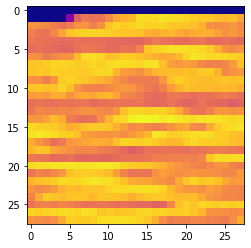

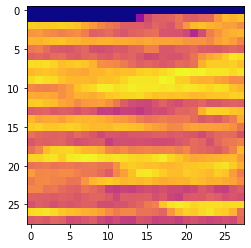

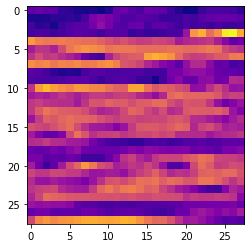

In [35]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train_under.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

# plot first few images

for i in range(3):
    
# plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('plasma'))
# show the figure
    plt.show()

In [36]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [37]:
X_train[0]

array([[-1.83234453e-01, -1.83234453e-01, -1.83234453e-01,
        -1.83234453e-01, -1.83234453e-01, -1.83234453e-01,
        -1.83234453e-01, -1.83234453e-01, -1.83234453e-01,
        -1.83234453e-01, -1.83234453e-01, -1.83234453e-01,
        -1.83234453e-01, -1.83234453e-01, -1.83234453e-01,
        -1.83234453e-01, -1.83234453e-01, -1.83234453e-01,
        -1.83234453e-01, -1.83234453e-01, -1.83234453e-01,
        -1.83234453e-01, -1.83234453e-01, -1.83234453e-01,
        -1.83234453e-01, -1.83234453e-01, -1.83234453e-01,
        -1.83234453e-01],
       [-1.83234453e-01, -1.83234453e-01, -1.83234453e-01,
        -1.83234453e-01, -1.83234453e-01, -1.30827293e-01,
        -6.94608241e-02, -5.59022427e-02, -6.09427467e-02,
        -5.98850399e-02, -4.55957353e-02, -3.10527608e-02,
        -2.60132719e-02, -2.05313750e-02, -5.22574969e-03,
        -5.41675044e-03, -6.51546009e-03, -8.39326764e-04,
        -3.63053381e-03, -5.92754502e-03, -8.86559486e-03,
        -1.13229770e-02, -1.40

In [38]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [39]:
X_train.shape , X_test.shape

((288, 28, 28, 1), (238, 28, 28, 1))

In [40]:
X_train[0].shape

(28, 28, 1)

In [41]:
y_test_original=y_test

In [42]:
y_test_original

285    1
549    2
350    1
91     1
725    3
      ..
180    1
185    1
664    2
755    1
639    2
Name: Accent_num, Length: 238, dtype: int64

In [43]:
y_test_original.value_counts()

1    130
2     67
3     41
Name: Accent_num, dtype: int64

In [44]:
y_train_under

0      1
1      1
2      1
3      1
4      1
      ..
283    3
284    3
285    3
286    3
287    3
Name: Accent_num, Length: 288, dtype: int64

In [45]:
y_train=np_utils.to_categorical(y_train_under,4)
y_test=np_utils.to_categorical(y_test,4)

In [46]:
y_train.shape

(288, 4)

In [47]:
y_test.shape

(238, 4)

In [48]:
y_train.shape , y_test.shape

((288, 4), (238, 4))

In [49]:
y_train

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [50]:
y_test

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [51]:
type(X_train)

numpy.ndarray

In [52]:
type(y_train)

numpy.ndarray

In [53]:
type(y_test)

numpy.ndarray

# CNN model for classification

In [54]:
cnn=Sequential()

In [55]:
cnn.add(Conv2D(filters = 4,
               kernel_size=(3,3),
               activation='relu',
               input_shape=(28,28,1)))

In [56]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [57]:
cnn.add(Flatten())

# Add a densely-connected layer with 128 neurons.
cnn.add(Dense(128,activation ='relu'))
cnn.add(Dense(64,activation ='relu'))


# Add output layer with 10 neurons.
cnn.add(Dense(4,activation='softmax'))

# compiler
cnn.compile(loss='categorical_crossentropy',
           optimizer = 'adam',
            metrics = ['accuracy']
           )

In [58]:
history = cnn.fit(X_train,
              y_train,
              batch_size=50,
              epochs=150,
              validation_data = (X_test, y_test),
              verbose=1)

Epoch 1/150
6/6 [==============================] - 0s 29ms/step - loss: 1.3769 - accuracy: 0.3021 - val_loss: 1.3577 - val_accuracy: 0.2815
Epoch 2/150
6/6 [==============================] - 0s 8ms/step - loss: 1.3365 - accuracy: 0.3438 - val_loss: 1.2813 - val_accuracy: 0.5462
Epoch 3/150
6/6 [==============================] - 0s 8ms/step - loss: 1.2522 - accuracy: 0.3333 - val_loss: 1.1527 - val_accuracy: 0.5462
Epoch 4/150
6/6 [==============================] - 0s 9ms/step - loss: 1.1503 - accuracy: 0.3333 - val_loss: 1.0880 - val_accuracy: 0.5462
Epoch 5/150
6/6 [==============================] - 0s 9ms/step - loss: 1.1064 - accuracy: 0.3299 - val_loss: 1.1052 - val_accuracy: 0.3319
Epoch 6/150
6/6 [==============================] - 0s 9ms/step - loss: 1.0879 - accuracy: 0.3750 - val_loss: 1.0689 - val_accuracy: 0.4790
Epoch 7/150
6/6 [==============================] - 0s 9ms/step - loss: 1.0800 - accuracy: 0.4167 - val_loss: 1.1037 - val_accuracy: 0.3782
Epoch 8/150
6/6 [=========

6/6 [==============================] - 0s 11ms/step - loss: 0.3773 - accuracy: 0.8854 - val_loss: 1.3375 - val_accuracy: 0.4496
Epoch 60/150
6/6 [==============================] - 0s 11ms/step - loss: 0.3726 - accuracy: 0.8889 - val_loss: 1.2924 - val_accuracy: 0.5210
Epoch 61/150
6/6 [==============================] - 0s 11ms/step - loss: 0.3639 - accuracy: 0.8819 - val_loss: 1.2940 - val_accuracy: 0.5126
Epoch 62/150
6/6 [==============================] - 0s 10ms/step - loss: 0.3447 - accuracy: 0.8958 - val_loss: 1.3695 - val_accuracy: 0.4580
Epoch 63/150
6/6 [==============================] - 0s 10ms/step - loss: 0.3369 - accuracy: 0.8993 - val_loss: 1.3674 - val_accuracy: 0.4790
Epoch 64/150
6/6 [==============================] - 0s 10ms/step - loss: 0.3259 - accuracy: 0.8958 - val_loss: 1.3632 - val_accuracy: 0.5000
Epoch 65/150
6/6 [==============================] - 0s 12ms/step - loss: 0.3263 - accuracy: 0.8993 - val_loss: 1.4977 - val_accuracy: 0.4328
Epoch 66/150
6/6 [========

6/6 [==============================] - 0s 13ms/step - loss: 0.0468 - accuracy: 1.0000 - val_loss: 2.3689 - val_accuracy: 0.4664
Epoch 118/150
6/6 [==============================] - 0s 13ms/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 2.2558 - val_accuracy: 0.5042
Epoch 119/150
6/6 [==============================] - 0s 13ms/step - loss: 0.0368 - accuracy: 1.0000 - val_loss: 2.2962 - val_accuracy: 0.5084
Epoch 120/150
6/6 [==============================] - 0s 13ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 2.3230 - val_accuracy: 0.4916
Epoch 121/150
6/6 [==============================] - 0s 13ms/step - loss: 0.0340 - accuracy: 1.0000 - val_loss: 2.3242 - val_accuracy: 0.5042
Epoch 122/150
6/6 [==============================] - 0s 13ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 2.3587 - val_accuracy: 0.4958
Epoch 123/150
6/6 [==============================] - 0s 12ms/step - loss: 0.0330 - accuracy: 1.0000 - val_loss: 2.3891 - val_accuracy: 0.4916
Epoch 124/150
6/6 [=

# Train and Test Loss with CNN

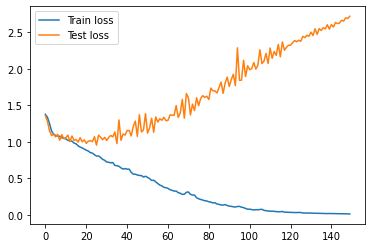

In [59]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

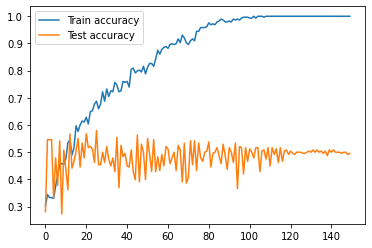

In [60]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.legend();

In [61]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']
test_acc = history.history['val_accuracy']

df = pd.DataFrame(list(zip(train_acc, test_acc, train_loss, test_loss)), 
               columns =['train_acc', 'test_acc', 'train_loss', 'test_loss']) 

df['accuracy_diff'] = df['train_acc'] - df['test_acc']
df['loss_diff'] = df['train_loss'] - df['test_loss']

df.tail()

,train_acc,test_acc,train_loss,test_loss,accuracy_diff,loss_diff
145,1.0,0.495798,0.015751,2.666613,0.504202,-2.650862
146,1.0,0.500000,0.015160,2.655125,0.500000,-2.639965
147,1.0,0.500000,0.014467,2.699742,0.500000,-2.685276
148,1.0,0.491597,0.014566,2.690761,0.508403,-2.676194
149,1.0,0.495798,0.013582,2.721345,0.504202,-2.707763


In [62]:
y_pred=cnn.predict(X_test)

In [63]:
y_pred=np.argmax(y_pred,axis=1)

In [64]:
cnf=confusion_matrix(y_test_original, y_pred)

In [65]:
target_names=['American','Chinies','Indian']

print(classification_report(y_test_original, y_pred, 
 target_names=target_names))

              precision    recall  f1-score   support

    American       0.72      0.52      0.61       130
     Chinies       0.44      0.45      0.44        67
      Indian       0.26      0.49      0.34        41

    accuracy                           0.50       238
   macro avg       0.48      0.49      0.46       238
weighted avg       0.56      0.50      0.52       238



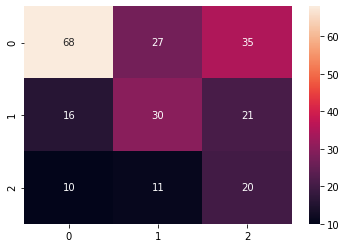

In [66]:
sns.heatmap(cnf,annot=True);

# Adding regularization to the CNN model

In [67]:
cnn2 = Sequential()

cnn2.add(Conv2D(filters = 6,            
                     kernel_size = (3, 3),       
                     activation='relu',     
                     input_shape=(28,28,1))) 


cnn2.add(MaxPooling2D(pool_size=(2,2))) 

cnn2.add(Flatten())  

cnn2.add(Dense(128, activation='relu'))  

###Add dropout 

cnn2.add(Dropout(0.05))

cnn2.add(Dense(64, activation = 'relu'))

###add dropout
cnn2.add(Dropout(0.05))

cnn2.add(Dense(4, activation='softmax'))   

cnn2.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [68]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0 , patience = 10)

In [69]:
history = cnn2.fit(X_train,
              y_train,
              batch_size=500,
              epochs=150,
              validation_data = (X_test, y_test),
             callbacks=[early_stop],
              verbose=1)

Epoch 1/150
1/1 [==============================] - 0s 121ms/step - loss: 1.3950 - accuracy: 0.0139 - val_loss: 1.3866 - val_accuracy: 0.2647
Epoch 2/150
1/1 [==============================] - 0s 22ms/step - loss: 1.3821 - accuracy: 0.3299 - val_loss: 1.3805 - val_accuracy: 0.2731
Epoch 3/150
1/1 [==============================] - 0s 28ms/step - loss: 1.3737 - accuracy: 0.3542 - val_loss: 1.3731 - val_accuracy: 0.2815
Epoch 4/150
1/1 [==============================] - 0s 28ms/step - loss: 1.3635 - accuracy: 0.3333 - val_loss: 1.3644 - val_accuracy: 0.2815
Epoch 5/150
1/1 [==============================] - 0s 29ms/step - loss: 1.3510 - accuracy: 0.3333 - val_loss: 1.3544 - val_accuracy: 0.2815
Epoch 6/150
1/1 [==============================] - 0s 30ms/step - loss: 1.3376 - accuracy: 0.3333 - val_loss: 1.3421 - val_accuracy: 0.2815
Epoch 7/150
1/1 [==============================] - 0s 28ms/step - loss: 1.3206 - accuracy: 0.3333 - val_loss: 1.3280 - val_accuracy: 0.2815
Epoch 8/150
1/1 [==

1/1 [==============================] - 0s 36ms/step - loss: 0.9705 - accuracy: 0.6146 - val_loss: 1.0080 - val_accuracy: 0.5798
Epoch 60/150
1/1 [==============================] - 0s 34ms/step - loss: 0.9786 - accuracy: 0.5451 - val_loss: 1.0076 - val_accuracy: 0.5798
Epoch 61/150
1/1 [==============================] - 0s 35ms/step - loss: 0.9770 - accuracy: 0.5382 - val_loss: 1.0143 - val_accuracy: 0.5756
Epoch 62/150
1/1 [==============================] - 0s 34ms/step - loss: 0.9606 - accuracy: 0.5694 - val_loss: 1.0175 - val_accuracy: 0.5630
Epoch 63/150
1/1 [==============================] - 0s 40ms/step - loss: 0.9654 - accuracy: 0.5590 - val_loss: 1.0095 - val_accuracy: 0.5630
Epoch 64/150
1/1 [==============================] - 0s 40ms/step - loss: 0.9566 - accuracy: 0.5660 - val_loss: 0.9951 - val_accuracy: 0.5672
Epoch 65/150
1/1 [==============================] - 0s 36ms/step - loss: 0.9577 - accuracy: 0.5590 - val_loss: 0.9871 - val_accuracy: 0.5672
Epoch 66/150
1/1 [========

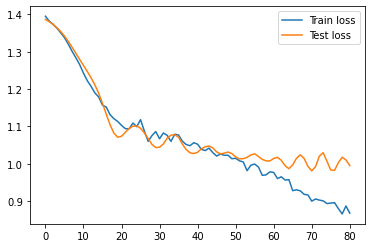

In [70]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

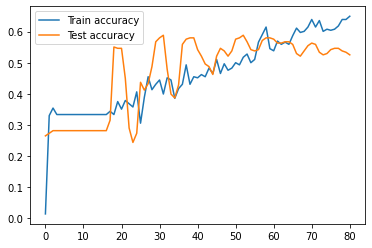

In [71]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.legend();

In [72]:
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1014)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               129920    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [73]:
y_pred2=cnn2.predict(X_test)

In [74]:
y_pred2=np.argmax(y_pred2,axis=1)

In [75]:
y_pred2

array([1, 2, 3, 1, 2, 1, 2, 3, 3, 2, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 1,
       3, 1, 1, 2, 3, 2, 2, 1, 1, 2, 2, 3, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1,
       2, 3, 2, 2, 1, 1, 3, 3, 2, 2, 3, 2, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 2, 2, 3, 3,
       3, 2, 2, 1, 1, 1, 3, 2, 1, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 3, 3, 2, 1, 1, 1, 1,
       1, 1, 3, 3, 2, 2, 1, 3, 3, 3, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 3, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 3, 2, 3, 2, 3, 3, 1, 2, 1,
       2, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3,
       2, 3, 1, 3, 3, 1, 2, 2, 3, 2, 1, 3, 1, 1, 2, 3, 3, 1, 1, 2, 3, 1,
       3, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 3, 3, 2])

In [76]:
ls=list(zip(y_test_original,y_pred2))

In [77]:
ls1=[l for l in ls if l[0]==l[1]]
len(ls1)

125

In [78]:
cnf1=confusion_matrix(y_test_original, y_pred)

In [79]:
target_names=['American','Chinies','Indian']

In [80]:
print(classification_report(y_test_original, y_pred, 
 target_names=target_names))

              precision    recall  f1-score   support

    American       0.72      0.52      0.61       130
     Chinies       0.44      0.45      0.44        67
      Indian       0.26      0.49      0.34        41

    accuracy                           0.50       238
   macro avg       0.48      0.49      0.46       238
weighted avg       0.56      0.50      0.52       238



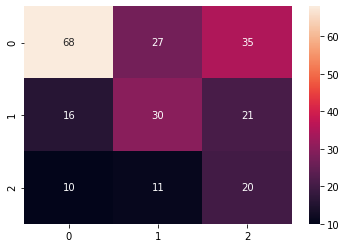

In [81]:
sns.heatmap(cnf1,annot=True)